In [1]:
from keras.layers import Input, Lambda, Dense, Flatten , Conv2D , MaxPooling2D , Dropout , LSTM
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
import cv2
import os

In [3]:
def read_img(folder):
    imgg=[]
    for filename in os.listdir(folder):
        img = plt.imread(os.path.join(folder , filename))
        img = cv2.resize(img , (224 , 224))
        imgg.append(img)
    return imgg

In [4]:
a = read_img('C:\\Users\\User-1\\Desktop\\Face')

In [5]:
np.shape(a)

(14, 224, 224, 3)

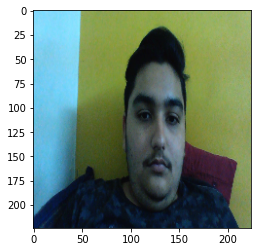

In [6]:
plt.imshow(a[0])

In [7]:
X = np.array(a)

In [8]:
b = [0,0,0,0,0,0,1,1,1,1,1,1,2,2]
y = np.array(b)

In [9]:
from keras.utils import to_categorical
y = to_categorical(y)

In [10]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', padding='same',input_shape=(224 , 224 , 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax')) 

In [11]:
y.shape

(14, 3)

In [12]:
model.compile(optimizer = 'Adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(X , y , epochs = 10)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 4.2791 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 780.8483 - accuracy: 0.4286
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 449.8828 - accuracy: 0.4286
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 78.9862 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 88.0853 - accuracy: 0.4286
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.2961 - accuracy: 0.9286
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.0019 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 2s 2s/step - loss: 12.9460 - accuracy: 0.7143
Epoch 9/10
1/1 [==============================] - 2s 2s/step - loss: 5.9605 - accuracy: 0.9286
Epoch 10/10
1/1 [==============================] - 2s 2s/step - loss: 5.9123 - accuracy: 0.9286


In [14]:
model.evaluate(X , y)

1/1 [==============================] - 1s 691ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

### TESTING PART

In [15]:
test = plt.imread('WIN_20210310_13_43_47_Pro.jpg')

In [16]:
test = cv2.resize(test , (224,224))

In [17]:
test = test.reshape(-1 , 224 , 224 , 3)

C:\Users\User-1\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


PREDICTION IS :  [0]


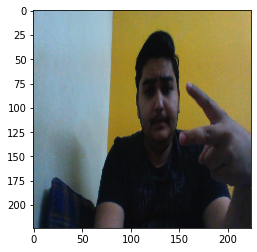

In [18]:
plt.imshow(test.reshape(224,224,3))
print("PREDICTION IS : ", model.predict_classes(test))

In [19]:
model.save('face_recognition.h5')

In [20]:
from keras.models import load_model
from PIL import Image

In [21]:
model1 = load_model('face_recognition.h5')

In [22]:
face_cascade = cv2.CascadeClassifier('C:\\Users\\User-1\\Desktop\\Object Detection\\Computer-Vision-Tutorial-master\\Haarcascades\\haarcascade_frontalface_default.xml')
def face_detector(img, size=0.5):
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 10)

    if faces is ():
        return None
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,0), 20)
        img = img[y:y+h , x:x+w]
    return img

cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read()
    face = face_detector(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face , (224 , 224))
        face = face.reshape(-1,224,224,3)
        #im = Image.fromarray(face , 'RGB')
        #img_array = np.array(im)
        #img_array = np.expand_dims(img_array , axis = 0)
        pred = model.predict_classes(face)
        #print(pred)
        
        if pred==0:
            cv2.putText(frame , 'anshul' , (50,50) , cv2.FONT_HERSHEY_COMPLEX , 1 , (0,255,0) , 5)
        
        else:
            cv2.putText(frame , 'piyu' , (50,50) , cv2.FONT_HERSHEY_COMPLEX , 1 , (0,255,0) , 5)
            
    else:
        cv2.putText(frame , 'None' , (50,50) , cv2.FONT_HERSHEY_COMPLEX , 1 , (0,255,0) , 5)
    cv2.imshow('face' , frame)
    if cv2.waitKey(1)==13:
        break

        
cap.release()
cv2.destroyAllWindows()